<a href="https://colab.research.google.com/github/celiaferreira/Covid19_RX/blob/master/7_3_DeepLearning_DataGen_4lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 7.3 Modelos de deep learning - DATA GENERATION com 4 labels

Esta secção apresenta modelos de **redes neuronais convolucionais** (CNN), para o conjunto de dados de treino aumentados via data generation, considerando um target com 4 labels.


### 7.3.1. CNN: label com 4 classes
De seguida são apresentadas 5 versões de CNN para classificar as imagens em:
* 0 - COVID-19
* 1 - Pneumonia viral
* 2 - Pneumonia bacteriana
* 3 - Normal

Serão testados os seguintes modelos:

In [ ]:
def build_model_CNN2(filters, kernel_size, dropout,labels):
  model = models.Sequential()
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(200, 200, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(2*filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(4*filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def build_model_CNN3(labels):
  #construct CNN structure
  model = Sequential()  
  #1st convolution layer
  model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(200,200,1)))
  model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
  #2nd convolution layer
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
  #3rd convolution layer
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
  
  model.add(Flatten())
  #fully connected neural networks
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model



---

**Versão 1**


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 64)      1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)            

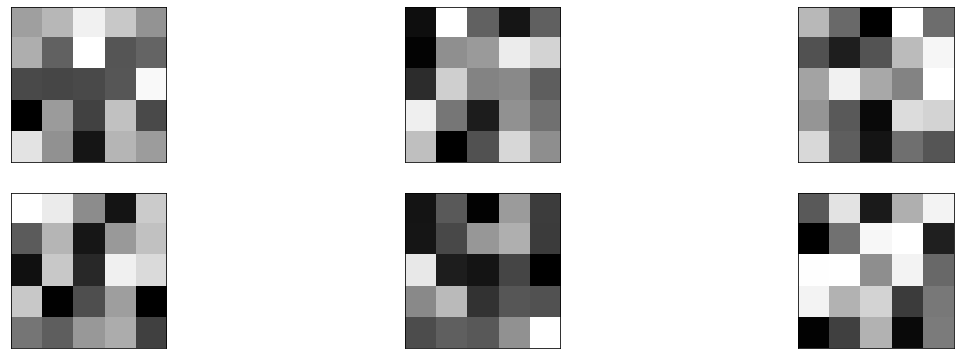

Predicted    0    1    2    3
Actual                       
0          218    4    2    7
1           12  464  110   42
2            6  128  160    9
3            5   13    6  820
accuracy total: 0.8285144566301097
precision covid: 0.9045643153526971
recall covid: 0.9437229437229437
precision total: 0.7939873550225636
recall total: 0.7955483083077097
label precision recall
    0     0.905  0.944
    1     0.762  0.739
    2     0.576  0.528
    3     0.934  0.972
2006/2006 [==============================] - 2s 1ms/step
[0.41211104657452696, 0.8285144567489624]


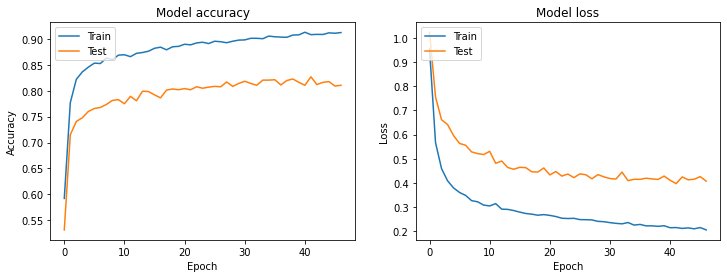

In [ ]:
model1=build_model_CNN1(64, 5, 0,4)
model1.summary()
tf.keras.utils.plot_model(model1, "model1.png", show_shapes = True)
history1=model1.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks)
camadas(model1)
output_metrics(model1,history1,X_test, y_test)

model_save_name = 'model1.sav'
path = F"/content/{model_save_name}" 
torch.save(model1, path)

O modelo atinge uma **precisão global de 82,9%**, identificando 94**% dos casos COVID-19**.

A matriz de confusão evidencia que o erro está essencialmente associado à capacidade do modelo distinguir pneumonia viral de bacteriana.

Os gráficos revelam overfitting significativo. 

Foi testada a seguir uma versão com **50% de dropout**, reduzindo também o tamanho do núcleo de 5 para 3.



---


**Versão 2**


Train on 5134 samples, validate on 1404 samples
Epoch 1/50
5134/5134 [==============================] - 17s 3ms/step - loss: 1.1209 - accuracy: 0.4782 - val_loss: 1.2232 - val_accuracy: 0.5064
Epoch 2/50
5134/5134 [==============================] - 16s 3ms/step - loss: 0.7309 - accuracy: 0.7330 - val_loss: 0.9647 - val_accuracy: 0.6902
Epoch 3/50
5134/5134 [==============================] - 16s 3ms/step - loss: 0.5998 - accuracy: 0.7840 - val_loss: 0.8390 - val_accuracy: 0.7329
Epoch 4/50
5134/5134 [==============================] - 16s 3ms/step - loss: 0.5316 - accuracy: 0.8118 - val_loss: 0.7475 - val_accuracy: 0.7443
Epoch 5/50
5134/5134 [==============================] - 16s 3ms/step - loss: 0.4881 - accuracy: 0.8204 - val_loss: 0.7371 - val_accuracy: 0.6895
Epoch 6/50
5134/5134 [==============================] - 16s 3ms/step - loss: 0.4573 - accuracy: 0.8305 - val_loss: 0.6524 - val_accuracy: 0.7543
Epoch 7/50
5134/5134 [==============================] - 16s 3ms/step - loss: 0.433

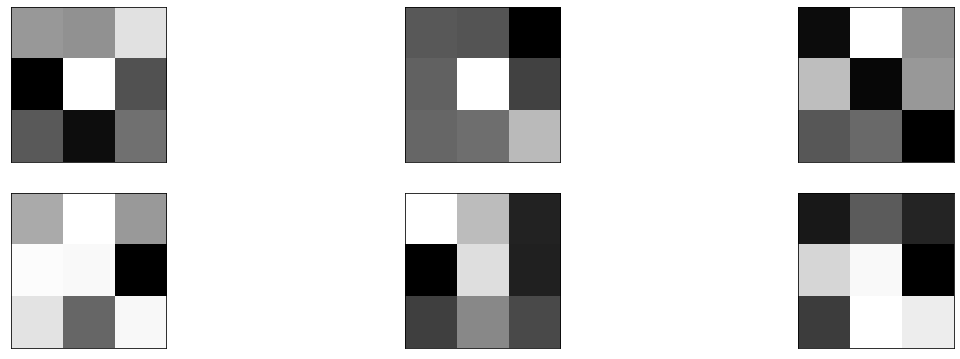

Predicted    0    1    2    3
Actual                       
0          208    5    9    9
1           10  493   81   44
2            1  177  115   10
3            6   23    4  811
accuracy total: 0.8110667996011964
precision covid: 0.9244444444444444
recall covid: 0.9004329004329005
precision total: 0.7772262559899679
recall total: 0.7564757938239218
label precision recall
    0     0.924  0.900
    1     0.706  0.785
    2     0.550  0.380
    3     0.928  0.961
2006/2006 [==============================] - 2s 1ms/step
[0.42967986212235504, 0.8110668063163757]


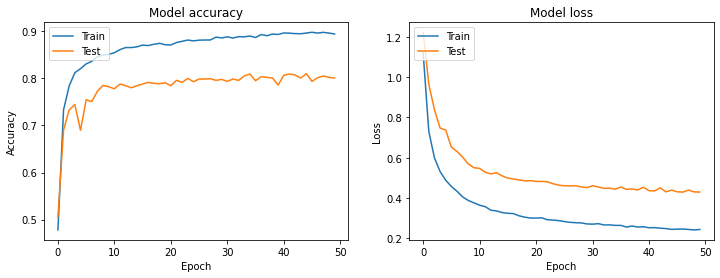

In [ ]:
model2=build_model_CNN1(64, 3, 0.5, 4)
history2=model2.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val))
model2.summary()
camadas(model2)
output_metrics(model2,history2,X_test, y_test)
model_save_name = 'model2.sav'
path = F"/content/{model_save_name}" 
torch.save(model2, path)
tf.keras.utils.plot_model(model2, "model2.png", show_shapes = True)
history_pickle.append(history2)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo atinge uma **precisão global de 81%**, inferior ao anterior, identificando **91% dos casos COVID-19**.


Os gráficos continuam a revelar overfitting.


---

**Versão 3**

O modelo seguinte é composto por 3 camadas convolucionais, intercaladas com pooling, mas com filtros distintos: 32, 64 e 128.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 67712)            

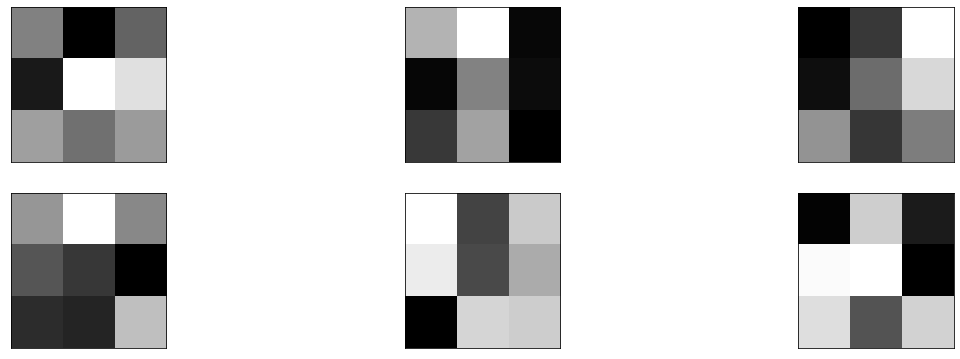

Predicted    0    1    2    3
Actual                       
0          213    6    4    8
1            8  491   90   39
2            3  154  136   10
3            4   25    8  807
accuracy total: 0.821036889332004
precision covid: 0.9342105263157895
recall covid: 0.922077922077922
precision total: 0.791499559117221
recall total: 0.7772327694412727
label precision recall
    0     0.934  0.922
    1     0.726  0.782
    2     0.571  0.449
    3     0.934  0.956
2006/2006 [==============================] - 2s 899us/step
[0.42739884726190613, 0.8210368752479553]


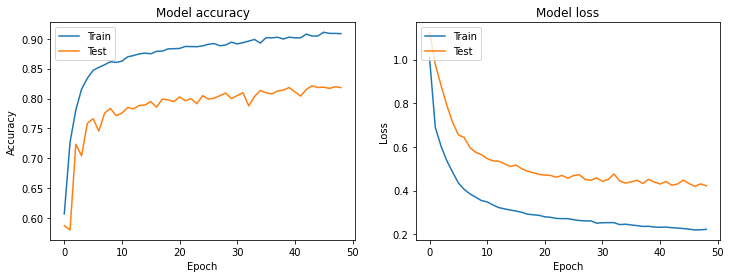

In [ ]:
model3=build_model_CNN2(32,3,0, 4)
model3.summary()
history3=model3.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks)
camadas(model3)
output_metrics(model3,history3,X_test, y_test)

model_save_name = 'model3.sav'
path = F"/content/{model_save_name}" 
torch.save(model3, path)
tf.keras.utils.plot_model(model3, "model3.png", show_shapes = True)

O modelo atinge uma **precisão global de 82%**, identificando **92% dos casos COVID-19**.

Mais uma vez, a matriz de confusão evidencia que o erro está essencialmente associado à capacidade do modelo distinguir pneumonia viral de bacteriana.

Os gráficos revelam overfitting.

---
**Versão 4**

O quarto modelo pretende controlar o ligeiro overfitting do modelo anterior, incluindo uma camada de **dropout** de 20%:



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 67712)            

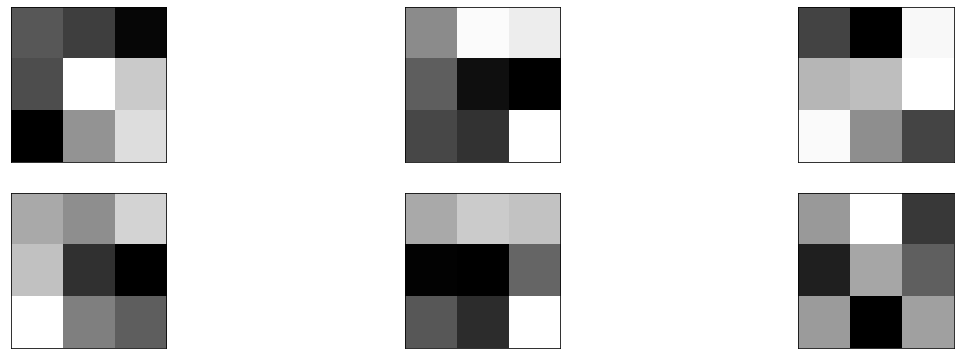

Predicted    0    1    2    3
Actual                       
0          196   16    7   12
1           16  530   54   28
2            1  193  106    3
3            8   42    4  790
accuracy total: 0.8085742771684945
precision covid: 0.8868778280542986
recall covid: 0.8484848484848485
precision total: 0.7834393445552661
recall total: 0.7445719584787893
label precision recall
    0     0.887  0.848
    1     0.679  0.844
    2     0.620  0.350
    3     0.948  0.936
2006/2006 [==============================] - 2s 897us/step
[0.45580123033623393, 0.8085742592811584]


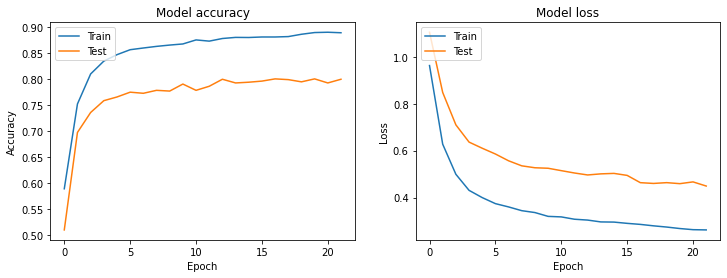

In [ ]:
model4=build_model_CNN2(32,3,0.2,4 )
model4.summary()
history4=model4.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks)
camadas(model4)
output_metrics(model4,history4,X_test, y_test)
model_save_name = 'model4.sav'
path = F"/content/{model_save_name}" 
torch.save(model4, path)
tf.keras.utils.plot_model(model4, "model4.png", show_shapes = True)
#batch_size=512
#83%+83%
history_pickle.append(history4)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

Não se verificam diferenças com a camada de dropout em relação à versão anterior.

---


**Versão 5**

O próximo modelo é um pouco **mais complexo**. Começa por uma camada convolucional de 64 filtros, seguida de pooling, depois 2 camadas convolucionais de 64 filtros seguidas de pooling e, por fim, 2 camadas convolucionais de 128  filtros, seguida de pooling. Não apresenta controlo de overfitting.


Train on 5134 samples, validate on 1404 samples
Epoch 1/50
5134/5134 [==============================] - 32s 6ms/step - loss: 0.9615 - accuracy: 0.5939 - val_loss: 0.9258 - val_accuracy: 0.6845
Epoch 2/50
5134/5134 [==============================] - 31s 6ms/step - loss: 0.5439 - accuracy: 0.7781 - val_loss: 0.8033 - val_accuracy: 0.6638
Epoch 3/50
5134/5134 [==============================] - 31s 6ms/step - loss: 0.4579 - accuracy: 0.8167 - val_loss: 0.6491 - val_accuracy: 0.7336
Epoch 4/50
5134/5134 [==============================] - 31s 6ms/step - loss: 0.4114 - accuracy: 0.8311 - val_loss: 0.5808 - val_accuracy: 0.7536
Epoch 5/50
5134/5134 [==============================] - 31s 6ms/step - loss: 0.3824 - accuracy: 0.8469 - val_loss: 0.5617 - val_accuracy: 0.7671
Epoch 6/50
5134/5134 [==============================] - 31s 6ms/step - loss: 0.3563 - accuracy: 0.8522 - val_loss: 0.5180 - val_accuracy: 0.7721
Epoch 7/50
5134/5134 [==============================] - 31s 6ms/step - loss: 0.340

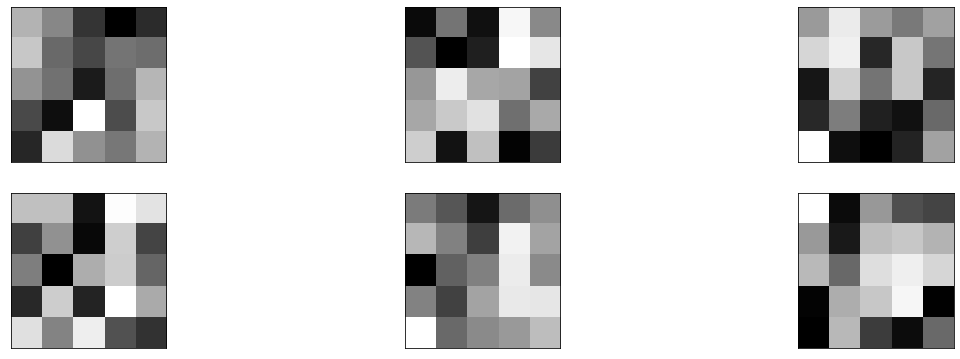

Predicted    0    1    2    3
Actual                       
0          218    4    3    6
1            8  499   60   61
2            4  182  104   13
3            2   17    1  824
accuracy total: 0.8200398803589233
precision covid: 0.9396551724137931
recall covid: 0.9437229437229437
precision total: 0.795258356766596
recall total: 0.7644616429879947
label precision recall
    0     0.940  0.944
    1     0.711  0.795
    2     0.619  0.343
    3     0.912  0.976
2006/2006 [==============================] - 3s 2ms/step
[0.4321477145461713, 0.8200398683547974]


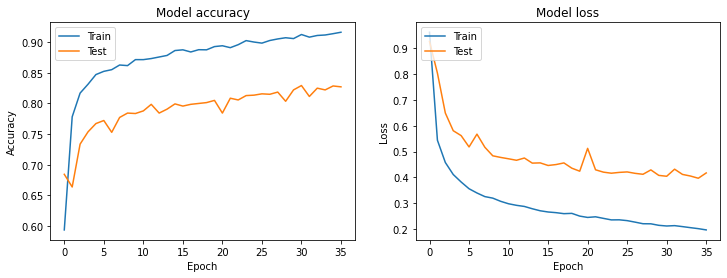

In [ ]:
model5=build_model_CNN3(4)
history5=model5.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks)
model5.summary()
camadas(model5)
output_metrics(model5,history5,X_test, y_test)

model_save_name = 'model5.sav'
path = F"/content/{model_save_name}" 
torch.save(model5, path)
tf.keras.utils.plot_model(model5, "model5.png", show_shapes = True)

O modelo tem uma performance aglobal de **82%**, mantendo a identificação de **94% dos casos COVID-19**.


Os gráficos apresentam também overfitting.


### 7.3.2. CNN com API funcional

Esta secção inclui estruturas mais complexas (que as sequenciais) de CNN, recorrendo à API funcional do Keras. São testados múltiplos extratores de features, assim como de camadas fully-connected.


---


**Versão 1**

In [ ]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D,AveragePooling2D
from keras.layers.merge import concatenate

def build_model_CNN_API_1(labels):
  visible = Input(shape=(200,200,1))
  # first feature extractor
  conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  flat1 = Flatten()(pool3)
  # second feature extractor

  conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
  pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
  conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
  conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
  flat2 = Flatten()(pool2_2)
  # merge feature extractors
  merge = concatenate([flat1, flat2])
  # interpretation layer
  hidden1 = Dense(128, activation='relu')(merge)
  hidden2 = Dense(64, activation='relu')(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)    
  # prediction output
  output = Dense(labels, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

Train on 5134 samples, validate on 1404 samples
Epoch 1/50
5134/5134 [==============================] - 27s 5ms/step - loss: 1.0615 - accuracy: 0.5499 - val_loss: 1.0877 - val_accuracy: 0.5100
Epoch 2/50
5134/5134 [==============================] - 25s 5ms/step - loss: 0.6064 - accuracy: 0.7540 - val_loss: 0.7957 - val_accuracy: 0.7108
Epoch 3/50
5134/5134 [==============================] - 25s 5ms/step - loss: 0.4560 - accuracy: 0.8216 - val_loss: 0.6486 - val_accuracy: 0.7322
Epoch 4/50
5134/5134 [==============================] - 25s 5ms/step - loss: 0.4034 - accuracy: 0.8348 - val_loss: 0.5939 - val_accuracy: 0.7607
Epoch 5/50
5134/5134 [==============================] - 25s 5ms/step - loss: 0.3790 - accuracy: 0.8487 - val_loss: 0.6053 - val_accuracy: 0.7564
Epoch 6/50
5134/5134 [==============================] - 25s 5ms/step - loss: 0.3619 - accuracy: 0.8545 - val_loss: 0.5750 - val_accuracy: 0.7557
Epoch 7/50
5134/5134 [==============================] - 25s 5ms/step - loss: 0.339

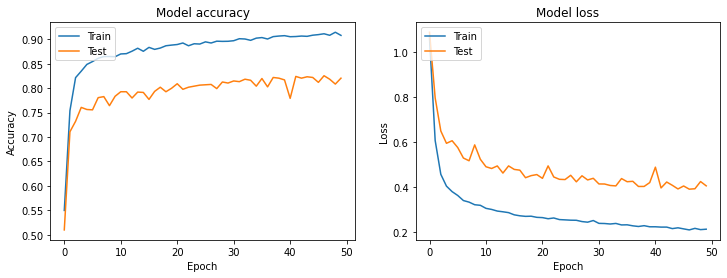

In [ ]:
model_CNN_API_1=build_model_CNN_API_1(4)
history_model_CNN_API_1=model_CNN_API_1.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val))
model_CNN_API_1.summary()
#camadas(model_CNN_API_1)
output_metrics(model_CNN_API_1,history_model_CNN_API_1,X_test, y_test)
model_save_name = 'model_CNN_API_1.sav'
path = F"/content/{model_save_name}" 
torch.save(model_CNN_API_1, path)
tf.keras.utils.plot_model(model_CNN_API_1, "model_CNN_API_1.png", show_shapes = True)

history_pickle.append(history_model_CNN_API_1)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)


O modelo apresenta uma accuracy de 82#, revelando overfitting.





---

**Versão 2**

Testa-se adicionalmente novo modelo recorrendo à API funcional:


In [ ]:
def build_model_CNN_API_2(labels):
  visible = Input(shape=(200,200,1))
  # first feature extractor
  conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  flat1 = Flatten()(pool3)
  # second feature extractor

  conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
  pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
  conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
  conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
  flat2 = Flatten()(pool2_2)
  # merge feature extractors
  merge = concatenate([flat1, flat2])
  # interpretation layer
  hidden1 = Dense(128, activation='relu')(merge)
  hidden2 = Dense(64, activation='relu',)(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)
  hidden4 = Dense(16, activation='relu')(hidden3)
  hidden5 = Dense(32, activation='relu')(hidden4)
  hidden6 = Dense(16, activation='relu')(hidden5)
  hidden7 = Dense(8, activation='relu')(hidden6)

  hidden1_1 = Dense(128, activation='relu')(merge)
  hidden2_1 = Dense(64, activation='relu')(hidden1_1)
  hidden3_1 = Dense(32, activation='relu')(hidden2_1)
  hidden4_1 = Dense(32, activation='relu')(hidden3_1)

  concatenated = concatenate([hidden3, hidden4_1])

  output = Dense(labels, activation='sigmoid')(concatenated)
  model = Model(inputs=visible, outputs=output)
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

Train on 5134 samples, validate on 1404 samples
Epoch 1/50
5134/5134 [==============================] - 26s 5ms/step - loss: 1.1387 - accuracy: 0.5884 - val_loss: 1.1448 - val_accuracy: 0.5157
Epoch 2/50
5134/5134 [==============================] - 27s 5ms/step - loss: 0.6092 - accuracy: 0.7390 - val_loss: 0.8034 - val_accuracy: 0.7101
Epoch 3/50
5134/5134 [==============================] - 26s 5ms/step - loss: 0.4573 - accuracy: 0.8196 - val_loss: 0.6895 - val_accuracy: 0.7272
Epoch 4/50
5134/5134 [==============================] - 26s 5ms/step - loss: 0.4069 - accuracy: 0.8342 - val_loss: 0.6239 - val_accuracy: 0.7358
Epoch 5/50
5134/5134 [==============================] - 26s 5ms/step - loss: 0.3898 - accuracy: 0.8335 - val_loss: 0.5924 - val_accuracy: 0.7593
Epoch 6/50
5134/5134 [==============================] - 26s 5ms/step - loss: 0.3623 - accuracy: 0.8527 - val_loss: 0.5532 - val_accuracy: 0.7785
Epoch 7/50
5134/5134 [==============================] - 26s 5ms/step - loss: 0.347

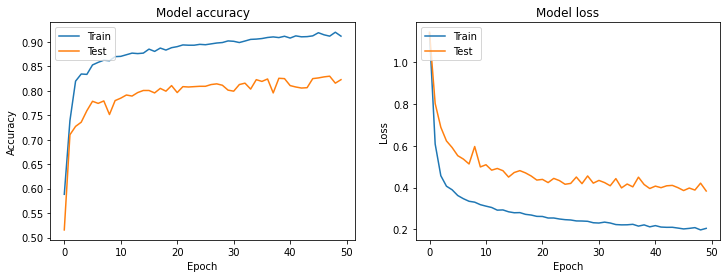

In [ ]:
model_CNN_API_2=build_model_CNN_API_2(4)
history_model_CNN_API_2=model_CNN_API_2.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val))
model_CNN_API_2.summary()
output_metrics(model_CNN_API_2,history_model_CNN_API_2,X_test, y_test)

model_save_name = 'model_CNN_API_2.sav'
path = F"/content/{model_save_name}" 
torch.save(model_CNN_API_2, path)
tf.keras.utils.plot_model(model_CNN_API_2, "model_CNN_API_2.png", show_shapes = True)

Os resultados obtidos estão em linha com as CNN anteriormente testadas, rondando os 83% de accuracy global.

### 7.3.3 Comparação de resultados

O gráfico abaixo compara a evolução da accuracye loss pelas epochs para os modelos testados.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


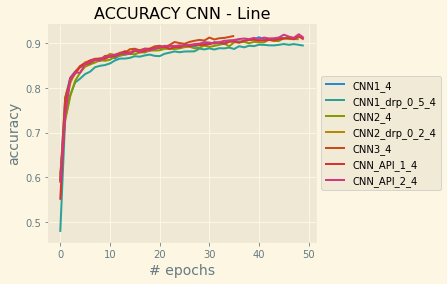

In [ ]:
with plt.style.context('Solarize_Light2'):
    plt.plot((history1.history['accuracy']),label='CNN1_4')
    plt.plot((history2.history['accuracy']),label='CNN1_drp_0_5_4')
    plt.plot((history3.history['accuracy']),label='CNN2_4')
    plt.plot((history4.history['accuracy']),label='CNN2_drp_0_2_4')
    plt.plot((history5.history['accuracy']),label='CNN3_4')
    plt.plot((history_model_CNN_API_1.history['accuracy']),label='CNN_API_1_4')
    plt.plot((history_model_CNN_API_2.history['accuracy']),label='CNN_API_2_4')
    plt.title('ACCURACY CNN - Line')
    plt.xlabel('# epochs', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend(loc='best')

plt.show()

Não são visíveis diferenças significativas entre os modelos CNN e API testados, considerando um target com 4 labels.